# Airbnb locations in Amsterdam

This project gives the housing locations that are offered by Airbnb in Amsterdam, The Netherlands.

Tools used to perform the data munging of this project:
Miniconda, Python 3.x, Jupyter Notebook, Pandas, GeoPandas with dependacies.

This Jupyter Notebook objective are:
    - load, downloaded dataset in the notebook
    - Analyse the dataset with the available methods
    - remove unnecesary columns, using the drop method
    - create the data geometry
    - write the cleaned data to file 

Link of the dataset: (http://insideairbnb.com/index.html).<br>
Authored by: Etienne Sambo.

## Packages and Data import

In [1]:
# Import package into notebook

%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import fiona

import warnings #suppresing warning, keep notebook looking clean!
warnings. simplefilter(action='ignore')

Use the **.read_csv() method** to request the CSV file ('listing.csv') and read it into the notebook and assign it to a variable named df.

In [2]:
df = pd.read_csv('../notebooks/data/listings_raw.csv');

## Explore and analyse dataset

In [3]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20337 entries, 0 to 20336
Columns: 106 entries, id to reviews_per_month
dtypes: float64(31), int64(25), object(50)
memory usage: 16.4+ MB


At first glance, this is a large data set with 106 columns.<br>
Let's read the first 5 and last 5 lines to see what kind of data we have here. Using **.head()** and **.tail() methods**.

In [4]:
# Read the first five records of teh dataset!
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190708161114,43655,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.09
1,20168,https://www.airbnb.com/rooms/20168,20190708161114,43655,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.45
2,25428,https://www.airbnb.com/rooms/25428,20190708161114,43655,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.17
3,27886,https://www.airbnb.com/rooms/27886,20190708161114,43655,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14
4,28871,https://www.airbnb.com/rooms/28871,20190708161114,43655,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.56


In [5]:
# Read the last five records of teh dataset!
df.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
20332,36495072,https://www.airbnb.com/rooms/36495072,20190708161114,43655,Apartment Amsterdam next to city center (1 per...,"Quiet apartment, close to the city center. Nex...",NaN,"Quiet apartment, close to the city center. Nex...",none,NaN,...,f,f,flexible,f,f,2,2,0,0,NaN
20333,36497290,https://www.airbnb.com/rooms/36497290,20190708161114,43655,Penthouse in Watergraafsmeer (Amsterdam),Penthouse op hoek met lichtinval vanuit 3 zijd...,De luxueuze keuken beschikt over Italiaans (Do...,Penthouse op hoek met lichtinval vanuit 3 zijd...,none,Op de plek van het (voormalige) beroemde Stadi...,...,t,f,flexible,f,f,1,1,0,0,NaN
20334,36497781,https://www.airbnb.com/rooms/36497781,20190708161114,43655,Cozy room in Amsterdam with nice (Hidden by Ai...,NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
20335,36498483,https://www.airbnb.com/rooms/36498483,20190708161114,43655,"City apartment near centre, water and beach",Spacious and bright apartment near waterfront ...,Enjoy your stay in our relaxed and comfortable...,Spacious and bright apartment near waterfront ...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
20336,36500242,https://www.airbnb.com/rooms/36500242,20190708161114,43655,Room in lovely central apartment,Room in a lovely 3 floor apartment right in th...,NaN,Room in a lovely 3 floor apartment right in th...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN


In [ ]:
# Show the columns of the dataframe.
cols = list(df.columns)
cols

# Drop columns!

In [6]:
# drop all selected columns
df = df.drop([
 'listing_url',
 'scrape_id',
 'last_scraped',
 'summary',
 'space',
 'description',   
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',   
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'market',
 'neighbourhood_group_cleansed',
 'city',   
 'smart_location',
 'is_location_exact',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'is_business_travel_ready',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month'], axis=1)

In [11]:
# These are the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20337 entries, 0 to 20336
Data columns (total 22 columns):
id                        20337 non-null int64
name                      20302 non-null object
host_id                   20337 non-null int64
host_name                 20313 non-null object
host_since                20313 non-null float64
host_location             20273 non-null object
street                    20337 non-null object
neighbourhood             19511 non-null object
neighbourhood_cleansed    20337 non-null object
state                     20141 non-null object
zipcode                   19471 non-null object
country_code              20337 non-null object
country                   20337 non-null object
latitude                  20337 non-null float64
longitude                 20337 non-null float64
property_type             20337 non-null object
room_type                 20337 non-null object
square_feet               389 non-null float64
price                     2

## Determine geometry using the longtitude and latitude fields.

In [12]:
geometry  = [Point(xy) for xy in zip(df.longitude, df.latitude)]

In [14]:
# Use the following coord.system (epgs: 4326)
# And the GeoDataFrame methods to create the correct data format! (gdf)
crs = {'init': 'epgs:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [15]:
gdf

,id,name,host_id,host_name,host_since,host_location,street,neighbourhood,neighbourhood_cleansed,state,...,country,latitude,longitude,property_type,room_type,square_feet,price,last_review,cancellation_policy,geometry
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,39715.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,North Holland,...,Netherlands,52.36575,4.94142,Apartment,Private room,NaN,59,43644.0,strict_14_with_grace_period,POINT (4.94142 52.36575)
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,40149.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,North Holland,...,Netherlands,52.36509,4.89354,Townhouse,Private room,NaN,80,43654.0,strict_14_with_grace_period,POINT (4.89354 52.36509)
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,40137.0,"New York, New York, United States","Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,North Holland,...,Netherlands,52.37297,4.88339,Apartment,Entire home/apt,NaN,125,43596.0,strict_14_with_grace_period,POINT (4.88339 52.37297)
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,40260.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,North Holland,...,Netherlands,52.38673,4.89208,Houseboat,Private room,NaN,150,43647.0,strict_14_with_grace_period,POINT (4.89208 52.38673)
4,28871,Comfortable double room,124245,Edwin,40311.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Amsterdam Centrum,Centrum-West,North Holland,...,Netherlands,52.36719,4.89092,Apartment,Private room,NaN,75,43648.0,moderate,POINT (4.890919999999999 52.36719)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,36495072,Apartment Amsterdam next to city center (1 per...,4008095,Aleksandra,41211.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Indische Buurt,Oud-Oost,North Holland,...,Netherlands,52.36199,4.92867,Apartment,Entire home/apt,NaN,80,NaN,flexible,POINT (4.928669999999999 52.36199000000001)
20333,36497290,Penthouse in Watergraafsmeer (Amsterdam),46369523,Elwin,42289.0,"Amsterdam, North Holland, Netherlands","Amsterdam, Noord-Holland, Netherlands",Watergraafsmeer,Watergraafsmeer,Noord-Holland,...,Netherlands,52.34480,4.94942,Apartment,Entire home/apt,NaN,350,NaN,flexible,POINT (4.94942 52.3448)
20334,36497781,Cozy room in Amsterdam with nice (Hidden by Ai...,4263291,Didier,41240.0,"London, England, United Kingdom","Amsterdam, Noord-Holland, Netherlands",Slotermeer-Zuidwest,Geuzenveld - Slotermeer,Noord-Holland,...,Netherlands,52.38431,4.81645,Apartment,Private room,NaN,30,NaN,flexible,POINT (4.81645 52.38431)
20335,36498483,"City apartment near centre, water and beach",274421872,Robin,43654.0,"Amsterdam, North Holland, Netherlands","Amsterdam, Noord-Holland, Netherlands",NaN,IJburg - Zeeburgereiland,Noord-Holland,...,Netherlands,52.35116,5.00162,Apartment,Entire home/apt,NaN,125,NaN,flexible,POINT (5.00162 52.35116)


In [25]:
# write DataFrame to CSV file
gdf.to_csv('../map/data/listings_cleaned_02.csv', index=False)

In [26]:
# write DataFrame to SHP file
gdf.to_file('../map/data/SHP')

In [16]:
# Verrify the data type
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [17]:
gdf.bounds

,minx,miny,maxx,maxy
0,4.94142,52.36575,4.94142,52.36575
1,4.89354,52.36509,4.89354,52.36509
2,4.88339,52.37297,4.88339,52.37297
3,4.89208,52.38673,4.89208,52.38673
4,4.89092,52.36719,4.89092,52.36719
...,...,...,...,...
20332,4.92867,52.36199,4.92867,52.36199
20333,4.94942,52.34480,4.94942,52.34480
20334,4.81645,52.38431,4.81645,52.38431
20335,5.00162,52.35116,5.00162,52.35116


In [18]:
gdf

,id,name,host_id,host_name,host_since,host_location,street,neighbourhood,neighbourhood_cleansed,state,...,country,latitude,longitude,property_type,room_type,square_feet,price,last_review,cancellation_policy,geometry
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,39715.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,North Holland,...,Netherlands,52.36575,4.94142,Apartment,Private room,NaN,59,43644.0,strict_14_with_grace_period,POINT (4.94142 52.36575)
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,40149.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-Oost,North Holland,...,Netherlands,52.36509,4.89354,Townhouse,Private room,NaN,80,43654.0,strict_14_with_grace_period,POINT (4.89354 52.36509)
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,40137.0,"New York, New York, United States","Amsterdam, North Holland, Netherlands",Grachtengordel,Centrum-West,North Holland,...,Netherlands,52.37297,4.88339,Apartment,Entire home/apt,NaN,125,43596.0,strict_14_with_grace_period,POINT (4.88339 52.37297)
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,40260.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Westelijke Eilanden,Centrum-West,North Holland,...,Netherlands,52.38673,4.89208,Houseboat,Private room,NaN,150,43647.0,strict_14_with_grace_period,POINT (4.89208 52.38673)
4,28871,Comfortable double room,124245,Edwin,40311.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Amsterdam Centrum,Centrum-West,North Holland,...,Netherlands,52.36719,4.89092,Apartment,Private room,NaN,75,43648.0,moderate,POINT (4.890919999999999 52.36719)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20332,36495072,Apartment Amsterdam next to city center (1 per...,4008095,Aleksandra,41211.0,"Amsterdam, Noord-Holland, The Netherlands","Amsterdam, North Holland, Netherlands",Indische Buurt,Oud-Oost,North Holland,...,Netherlands,52.36199,4.92867,Apartment,Entire home/apt,NaN,80,NaN,flexible,POINT (4.928669999999999 52.36199000000001)
20333,36497290,Penthouse in Watergraafsmeer (Amsterdam),46369523,Elwin,42289.0,"Amsterdam, North Holland, Netherlands","Amsterdam, Noord-Holland, Netherlands",Watergraafsmeer,Watergraafsmeer,Noord-Holland,...,Netherlands,52.34480,4.94942,Apartment,Entire home/apt,NaN,350,NaN,flexible,POINT (4.94942 52.3448)
20334,36497781,Cozy room in Amsterdam with nice (Hidden by Ai...,4263291,Didier,41240.0,"London, England, United Kingdom","Amsterdam, Noord-Holland, Netherlands",Slotermeer-Zuidwest,Geuzenveld - Slotermeer,Noord-Holland,...,Netherlands,52.38431,4.81645,Apartment,Private room,NaN,30,NaN,flexible,POINT (4.81645 52.38431)
20335,36498483,"City apartment near centre, water and beach",274421872,Robin,43654.0,"Amsterdam, North Holland, Netherlands","Amsterdam, Noord-Holland, Netherlands",NaN,IJburg - Zeeburgereiland,Noord-Holland,...,Netherlands,52.35116,5.00162,Apartment,Entire home/apt,NaN,125,NaN,flexible,POINT (5.00162 52.35116)


In [19]:
amsterdam = gdf[['neighbourhood_cleansed','geometry']]
#adam = gdf[['neighbourhood','geometry', 'price']]

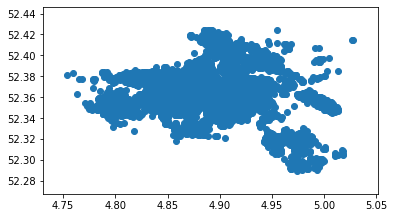

In [20]:
amsterdam.plot()

## Amsterdam data groupby neighbours

In [21]:
adam_neighbours = amsterdam.groupby('neighbourhood_cleansed')

In [22]:
# Count listing per neighbourhood
adam_neighbours.count()

,geometry
neighbourhood_cleansed,
Bijlmer-Centrum,118
Bijlmer-Oost,107
Bos en Lommer,1162
Buitenveldert - Zuidas,263
Centrum-Oost,1778
Centrum-West,2317
De Aker - Nieuw Sloten,150
De Baarsjes - Oud-West,3468
De Pijp - Rivierenbuurt,2503


neighbourhood_cleansed
Bijlmer-Centrum                           AxesSubplot(0.334126,0.125;0.356747x0.755)
Bijlmer-Oost                              AxesSubplot(0.260898,0.125;0.503204x0.755)
Bos en Lommer                             AxesSubplot(0.251211,0.125;0.522577x0.755)
Buitenveldert - Zuidas                    AxesSubplot(0.205502,0.125;0.613996x0.755)
Centrum-Oost                              AxesSubplot(0.140162,0.125;0.744676x0.755)
Centrum-West                              AxesSubplot(0.285184,0.125;0.454633x0.755)
De Aker - Nieuw Sloten                    AxesSubplot(0.176238,0.125;0.672524x0.755)
De Baarsjes - Oud-West                    AxesSubplot(0.210924,0.125;0.603151x0.755)
De Pijp - Rivierenbuurt                   AxesSubplot(0.303191,0.125;0.418618x0.755)
Gaasperdam - Driemond                     AxesSubplot(0.156814,0.125;0.711372x0.755)
Geuzenveld - Slotermeer                   AxesSubplot(0.125,0.225916;0.775x0.553168)
IJburg - Zeeburgereiland                  

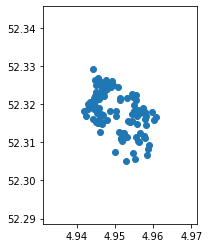

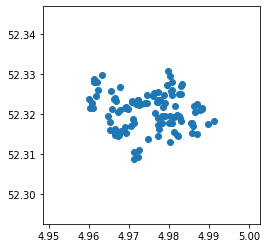

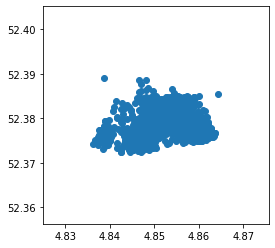

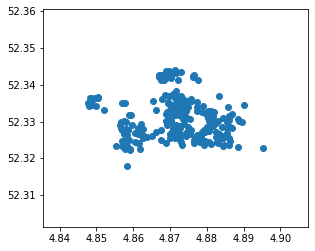

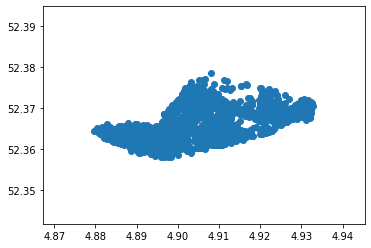

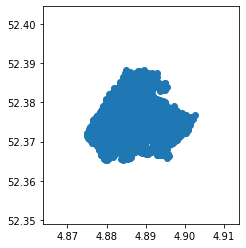

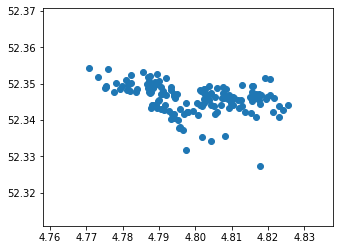

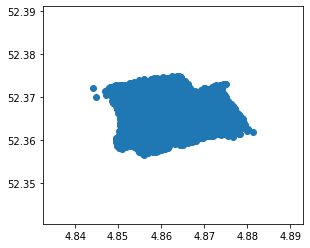

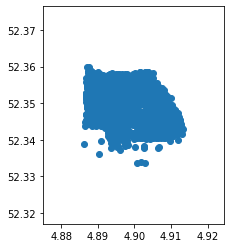

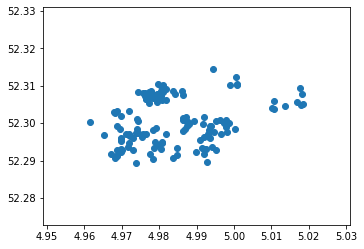

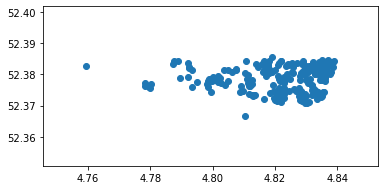

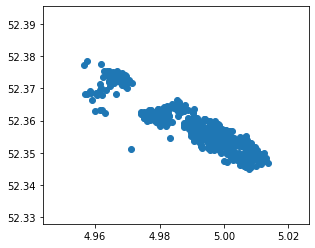

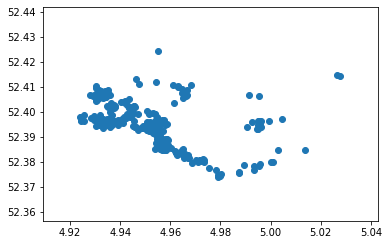

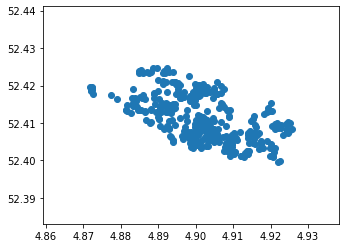

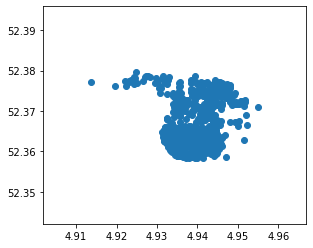

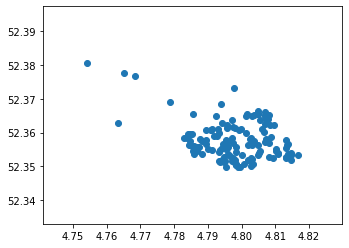

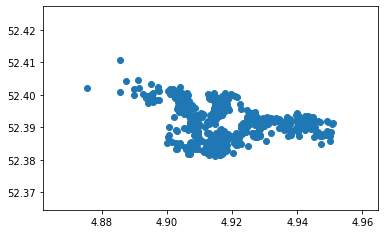

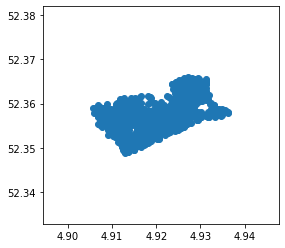

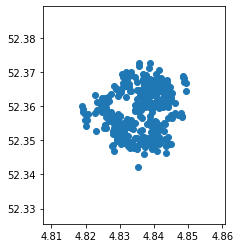

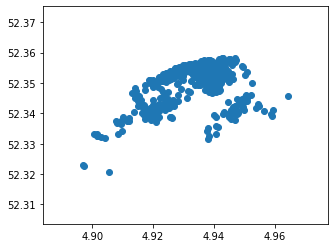

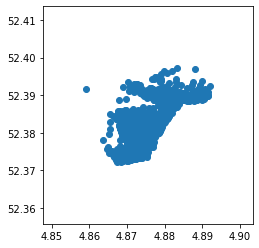

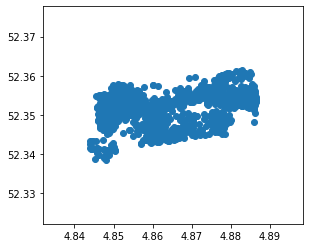

In [24]:
# Plot listing per neighbourhood
adam_neighbours.plot()